# Unsupervised Learning and Recommendations with Scikit Learn

This tutorial is a part of the [Machine Learning with Python: Zero to GBMs](http://zerotogbms.com) and [Zero to Data Science Bootcamp by Jovian](https://zerotodatascience.com).

![](https://i.imgur.com/eyfi64y.png)

The following topics are covered in this tutorial:

- Overview of unsupervised learning algorithms in Scikit-learn
- Clustering algorithms: K Means, DBScan, Hierarchical clustering etc.
- Dimensionality reduction (PCA) and manifold learning (t-SNE)

## Introduction to Unsupervised Learning

Unsupervised machine learning refers to the category of machine learning techniques where models are trained on a dataset without labels. Unsupervised learning is generally use to discover patterns in data and reduce high-dimensional data to fewer dimensions. Here's how unsupervised learning fits into the landscape of machine learning algorithms([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">

Here are the topics in machine learning that we're studying in this course ([source](https://vas3k.com/blog/machine_learning/)):

<img src="https://i.imgur.com/VbVFAsg.png" width="640">

Scikit-learn offers the following cheatsheet to decide which model to pick for a given problem. Can you identify the unsupervised learning algorithms?

![](https://scikit-learn.org/stable/_static/ml_map.png)

Here is a full list of unsupervised learning algorithms available in Scikit-learn: https://scikit-learn.org/stable/unsupervised_learning.html

## Clustering

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)). Scikit-learn offers several clustering algorithms. You can learn more about them here: https://scikit-learn.org/stable/modules/clustering.html

Here is a visual representation of clustering:

<img src="https://i.imgur.com/VXPgw6H.png" width="400">


Here are some real-world applications of clustering:

* Customer segmentation
* Product recommendation
* Feature engineering
* Anomaly/fraud detection
* Taxonomy creation

We'll use the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to study some of the clustering algorithms available in `scikit-learn`. It contains various measurements for 150 flowers belonging to 3 different species.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


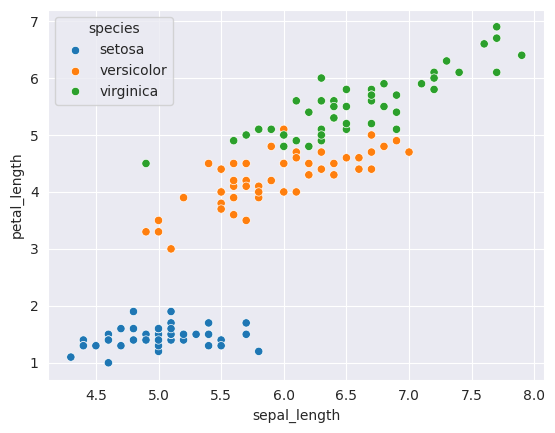

In [4]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');

We'll attempt to cluster observations using numeric columns in the data.

In [5]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [6]:
X = iris_df[numeric_cols]

### K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

<img src="https://miro.medium.com/max/1400/1*rw8IUza1dbffBhiA4i0GNQ.png" width="640">

Here's how the K-means algorithm works:

1. Pick K random objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

Here's a video showing the above steps: https://www.youtube.com/watch?v=4b5d3muPQmA

Let's apply K-means clustering to the Iris dataset.

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters=3,random_state=42)


In [9]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

We can check the cluster centers for each cluster.

In [10]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

We can now classify points using the model.

In [11]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

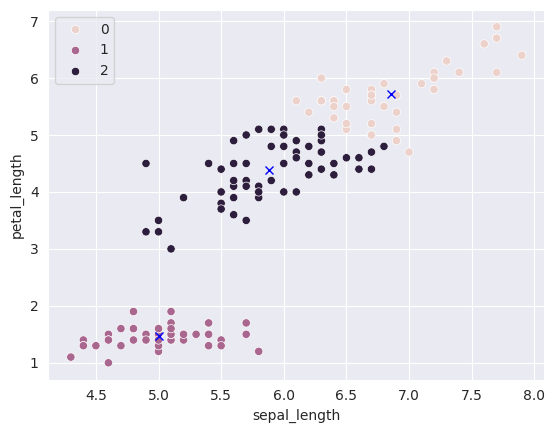

In [13]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

As you can see, K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. Note that we did not provide the "species" column as an input to `KMeans`.

We can check the "goodness" of the fit by looking at `model.inertia_`, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [15]:
model.inertia_

78.85566582597727

Let's try creating 6 clusters.

In [16]:
model = KMeans(n_clusters=6, random_state=42).fit(X)

In [17]:
preds = model.predict(X)
preds

array([1, 5, 5, 5, 1, 1, 5, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 5, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 0, 4, 4, 4, 3, 3, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 3, 3, 3,
       4, 0, 0, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0], dtype=int32)

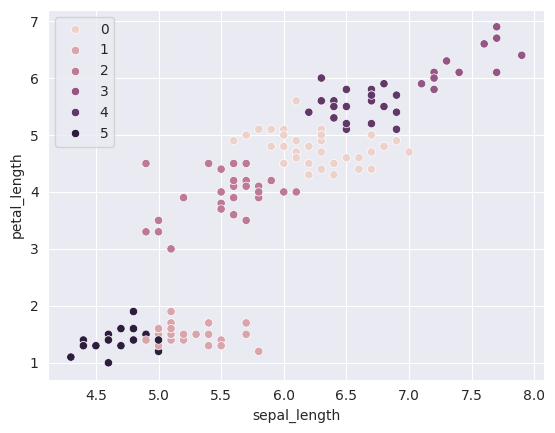

In [18]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" to pick the right number of clusters.

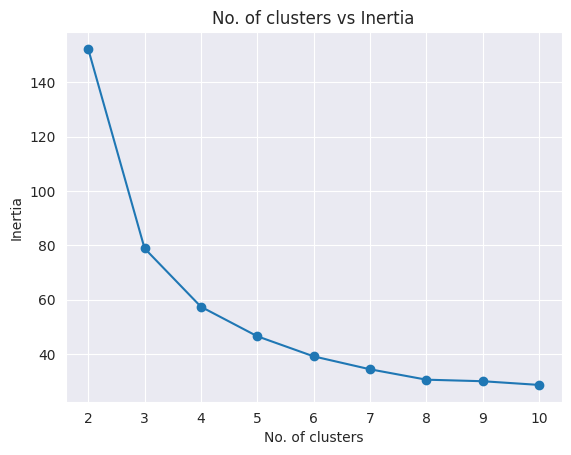

In [19]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)


plt.title("No. of clusters vs Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel("No. of clusters")
plt.ylabel("Inertia");

The chart is creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.

**Mini Batch K Means**: The K-means algorithm can be quite slow for really large dataset. Mini-batch K-means is an iterative alternative to K-means that works well for large datasets. Learn more about it here: https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans


> **EXERCISE**: Perform clustering on the [Mall customers dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) on Kaggle. Study the segments carefully and report your observations.

### DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has two main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png" width="400">

Here's a video explaining how the DBSCAN algorithm works: https://www.youtube.com/watch?v=C3r7tGRe2eI

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
?DBSCAN

In [22]:
model = DBSCAN(eps=1.1, min_samples=4)

In [23]:
model.fit(X)

DBSCAN(eps=1.1, min_samples=4)

In DBSCAN, there's no prediction step. It directly assigns labels to all the inputs.

In [24]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

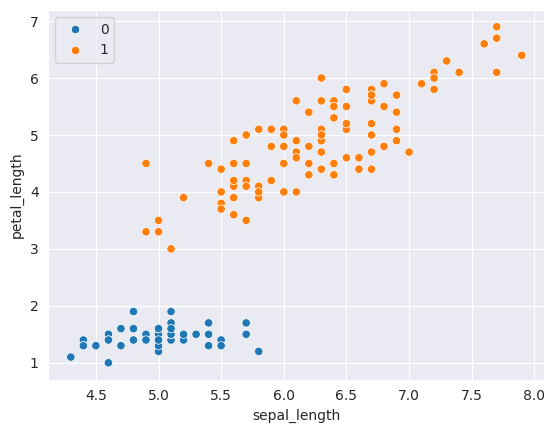

In [25]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_);

> **EXERCISE**: Try changing the values of `eps` and `min_samples` and observe how the number of clusters the classification changes.

Here's how the results of DBSCAN and K Means differ:

<img src="https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png" width="640">

### Hierarchical Clustering

Hierarchical clustering, as the name suggests, creates a hierarchy or a tree of clusters.

<img src="https://dashee87.github.io/images/hierarch.gif" width="640">

While there are several approaches to hierarchical clustering, the most common approach works as follows:

1. Mark each point in the dataset as a cluster.
2. Pick the two closest cluster centers without a parent and combine them into a new cluster.
3. The new cluster is the parent cluster of the two clusters, and its center is the mean of all the points in the cluster.
3. Repeat steps 2 and 3 till there's just one cluster left.

Watch this video for a visual explanation of hierarchical clustering: https://www.youtube.com/watch?v=7xHsRkOdVwo

> **EXERCISE**: Implement hierarchical clustering for the Iris dataset using `scikit-learn`.|

## Dimensionality Reduction and Manifold Learning

In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number.


Applications of dimensionality reduction:

* Reducing size of data without loss of information
* Training machine learning models efficiently
* Visualizing high-dimensional data in 2/3 dimensions

### Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. Watch this video to learn how PCA works: https://www.youtube.com/watch?v=FgakZw6K1QQ

Here's an example of PCA to reduce 2D data to 1D:

<img src="https://i.imgur.com/ZJ7utlo.png" width="480">

Here's an example of PCA to reduce 3D data to 2D:

<img src="https://lihan.me/assets/images/pca-illustration.png" width="640">


Let's apply Principal Component Analysis to the Iris dataset.

In [26]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [29]:
from sklearn.decomposition import PCA

In [30]:
?PCA

In [32]:
pca = PCA(n_components=2)

In [33]:
pca.fit(iris_df[numeric_cols])

PCA(n_components=2)

In [34]:
pca

PCA(n_components=2)

In [35]:
transformed = pca.transform(iris_df[numeric_cols])

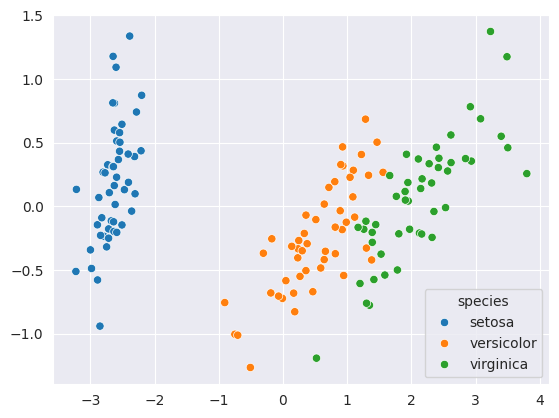

In [36]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);

As you can see, the PCA algorithm has done a very good job of separating different species of flowers using just 2 measures.

> **EXERCISE**: Apply Principal Component Analysis to a large high-dimensional dataset and train a machine learning model using the low-dimensional results. Observe the changes in the loss and training time for different numbers of target dimensions.

Learn more about Principal Component Analysis here: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Scikit-learn provides many algorithms for manifold learning: https://scikit-learn.org/stable/modules/manifold.html . A commonly-used manifold learning technique is t-Distributed Stochastic Neighbor Embedding or t-SNE, used to visualize high dimensional data in one, two or three dimensions.

Here's a visual representation of t-SNE applied to visualize 2 dimensional data in 1 dimension:

<img src="https://i.imgur.com/rVMAaix.png" width="360">


Here's a visual representation of t-SNE applied to the MNIST dataset, which contains 28px x 28px images of handrwritten digits 0 to 9, a reduction from 784 dimensions to 2 dimensions ([source](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)):

<img src="https://indico.io/wp-content/uploads/2015/08/mnist-1024x607-1.jpg" width="640">

Here's a video explaning how t-SNE works: https://www.youtube.com/watch?v=NEaUSP4YerM

In [37]:
from sklearn.manifold import TSNE

In [38]:
?TSNE

In [40]:
tsne = TSNE(n_components=2)

In [41]:
tsne = TSNE(n_components=2)

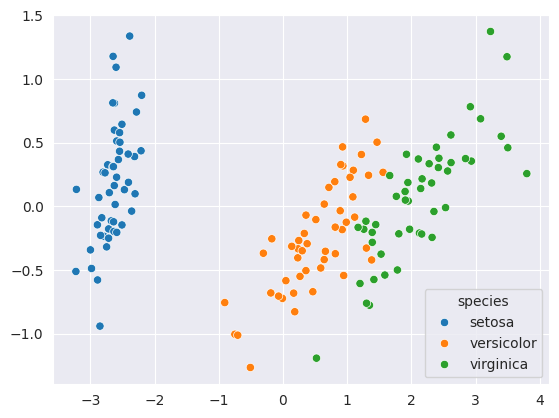

In [42]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);

As you can see, the flowers from the same species are clustered very closely together. The relative distance between the species is also conveyed by the gaps between the clusters.

> **EXERCISE**: Use t-SNE to visualize the [MNIST handwritten digits dataset](https://www.kaggle.com/oddrationale/mnist-in-csv).

## Summary and References

<img src="https://i.imgur.com/VbVFAsg.png" width="640">

The following topics were covered in this tutorial:

- Overview of unsupervised learning algorithms in Scikit-learn
- Clustering algorithms: K Means, DBScan, Hierarchical clustering etc.
- Dimensionality reduction (PCA) and manifold learning (t-SNE)


Check out these resources to learn more:

- https://www.coursera.org/learn/machine-learning
- https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
- https://scikit-learn.org/stable/unsupervised_learning.html
- https://scikit-learn.org/stable/modules/clustering.html